# Analysis of board game data from board game geek
Data sourced from kaggle dataset [melissamonfared/board-games][data_source]  

Last updated: 2022

Exploratory data analysis for patterns and relationships between the complexity and popularity of boardgames.

[data_source]: https://www.kaggle.com/datasets/melissamonfared/board-games/data

## Load to pandas 

In [2]:
import pandas as pd
import seaborn as sns
import os

if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    DATA_PATH = "/kaggle/input/boardgamegeek-dataset"
else:
    DATA_PATH= "data"

bgg_data = pd.read_csv(f'{DATA_PATH}/BGG_Data_Set.csv', encoding='latin-1')
bgg_data.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


## Examine Schema

In [3]:
print(bgg_data.shape)

(20343, 14)


In [4]:
bgg_data.info()
bgg_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


## Missing and inconsistent values

In [5]:
bgg_data[bgg_data['Year Published'].isna()] # 1 missing value 

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
13984,NaN,Hus,NaN,2,2,40,0,38,6.28,13986,2.0,NaN,NaN,NaN


The year that the game 'Hus' was created is unknown and it is an ancient game. We will keep it as None since our analysis will focus on the more recent games.

In [6]:
bgg_data[bgg_data['ID'].isna()]['ID'].size

16

There are 16 games that are missing the BGG ID. This is not the primary index and there are no missing values for names. The ID can be ignored for now unless we need to find relationships between games.

## Ratings, Complexity and Year Published

Mean:  6.403
Median:  6.43


<Axes: xlabel='Rating Average', ylabel='Count'>

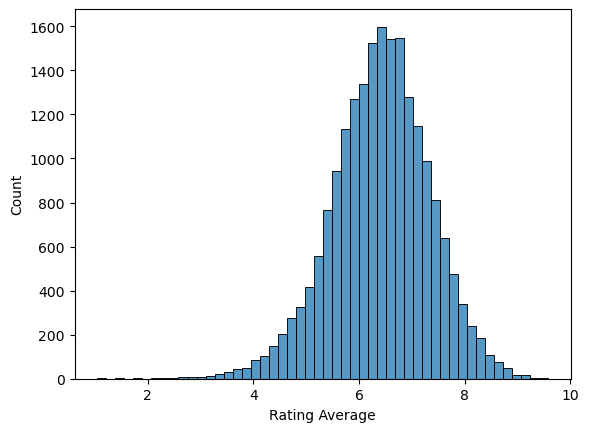

In [7]:
bgg_data[bgg_data['Rating Average'].isna()] # No missing values
bgg_data[bgg_data['Rating Average']==0] # No zero values
print(f"Mean: ", bgg_data['Rating Average'].mean().round(3))
print(f"Median: ", bgg_data['Rating Average'].median())
sns.histplot(bgg_data['Rating Average'], bins=50)

The rating average, represeting the average of ratings for a board game by different users. It is close to a normal distribution with mean of 6.4 on a 10 point scale.
There are no missing values for this series

Missing Values:  (426, 14)


<Axes: xlabel='Complexity Average', ylabel='Count'>

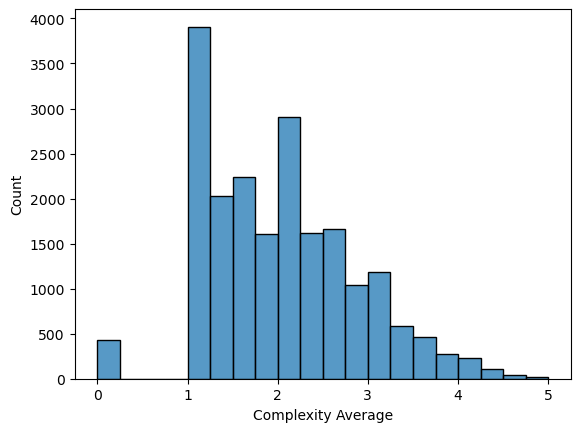

In [8]:
bgg_data[bgg_data['Complexity Average'].isna()] # No missing values but has 0.0 values
print('Missing Values: ',bgg_data[bgg_data['Complexity Average']==0.0].shape) # 426 zero values i.e 426 games with no complexity rating
sns.histplot(bgg_data['Complexity Average'], bins=20)

Complexity represents the difficulty level of a game with higher values indicating higher complexity. There are several records for which the complexity information is 0. This could be either because they are not complex at all but cross-examiniation of the data against the data in the website shows that it is likely due to missing values. We will replace the 0 values with None so that missing values are represented as nulls and avoid miscalulations. 

> **_Note_** : We can revisit this dataset by filling missing values with the xml api in a future exercise.

Mean:  2.034
Median:  2.0
Mode:  0    1.0
Name: Complexity Average, dtype: float64


<Axes: xlabel='Complexity Average', ylabel='Count'>

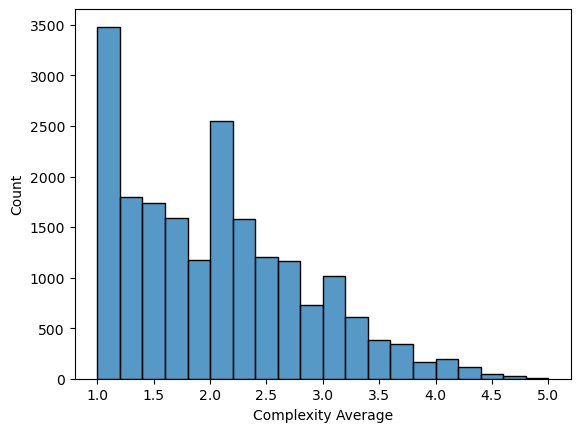

In [11]:
bgg_data.loc[bgg_data['Complexity Average']==0.0,'Complexity Average'] = None # Replace 0.0 with NaN
print('Mean: ',round(bgg_data['Complexity Average'].mean(),3))
print('Median: ',round(bgg_data['Complexity Average'].median(),3))
print('Mode: ',bgg_data['Complexity Average'].mode())
sns.histplot(bgg_data['Complexity Average'], bins=20)

Summary statistics on complexity shows that the mean and median are very close but the data is skewed to the right.   

Half of the games are of complexity 2 or less and a majority of games have been tagged with complexity = 1

Years range from -3500.0 to 2022.0


<Axes: xlabel='Year Published', ylabel='Count'>

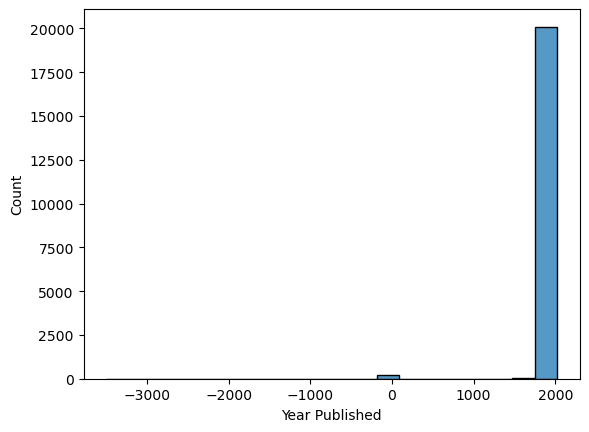

In [12]:
print(f'Years range from {bgg_data['Year Published'].min()} to {bgg_data['Year Published'].max()}')
sns.histplot(bgg_data['Year Published'], bins=20)

We have a non-trivial number of board games that date back a long time going back several millenia. These include a lot of classics like mancala, chess, etc and many obsure ones.

The data shows an exponential increase in the board games created in the recent decades. Since the dataset was created around beginning of 2021, we see a drop in the count of games created. 

> ***Note***: For the purpose of this exercise we will limit our analysis to the time period from 1950 to 2000.

<Axes: xlabel='Year Published', ylabel='Count'>

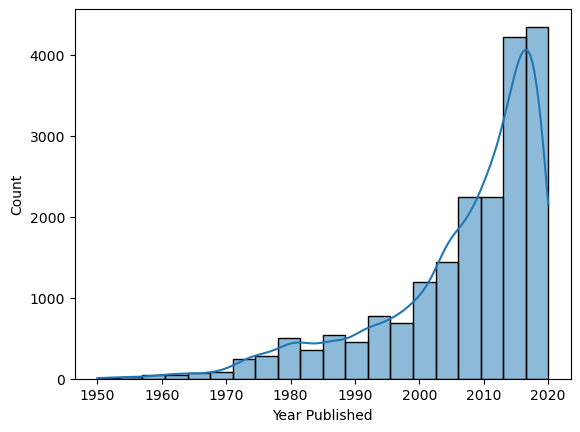

In [13]:
recent_games = bgg_data[(bgg_data['Year Published']>=1950) & (bgg_data['Year Published']<=2020)]
sns.histplot(recent_games['Year Published'], bins=20, kde=True)

Mean:  2.035
Median:  2.0
Mode:  0    1.0
Name: Complexity Average, dtype: float64


<Axes: xlabel='Complexity Average', ylabel='Count'>

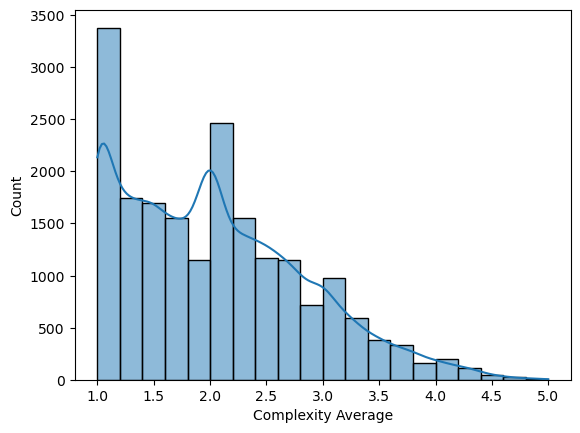

In [15]:
print('Mean: ',round(recent_games['Complexity Average'].mean(),3))
print('Median: ',round(recent_games['Complexity Average'].median(),3))
print('Mode: ',recent_games['Complexity Average'].mode().round(3))
sns.histplot(recent_games['Complexity Average'], bins=20, kde=True)

Looking at the summary statistics for complexity within the scoped time-period, the distribution retains similar measures of central tendency. i.e there are many games that are of lower complexity. Let's look at how complexity and ratings have trended over the years:

## Trends

<Axes: xlabel='Year Published', ylabel='Mean Complexity'>

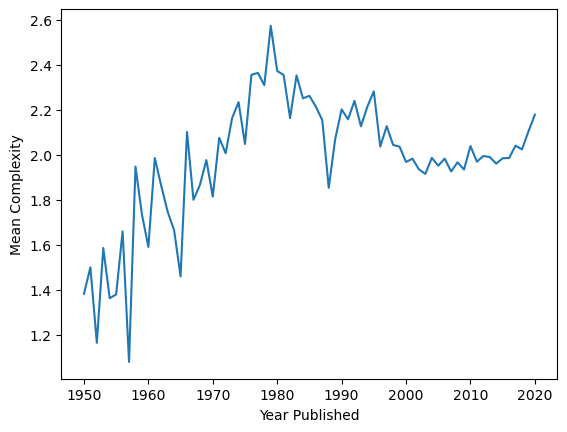

In [ ]:
# Group by year and get mean complexity
yearly_complexity = recent_games.groupby('Year Published')['Complexity Average'].mean().reset_index(name='Mean Complexity')
sns.lineplot(data=yearly_complexity, x='Year Published', y='Mean Complexity')

<Axes: xlabel='Year Published', ylabel='Mean Rating'>

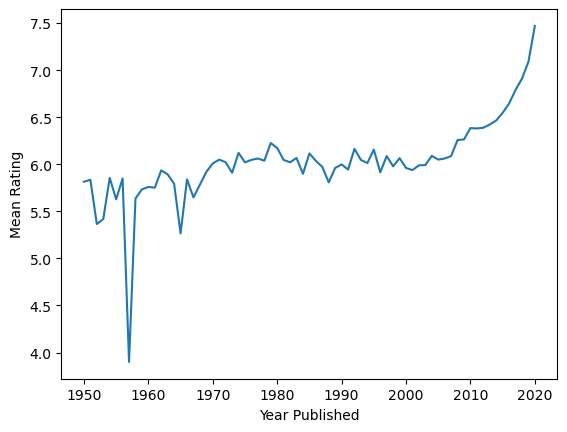

In [16]:
# Group by year and get mean rating
yearly_rating = recent_games.groupby('Year Published')['Rating Average'].mean().reset_index(name='Mean Rating')
sns.lineplot(data=yearly_rating, x='Year Published', y='Mean Rating')

<Axes: xlabel='Complexity Average', ylabel='Rating Average'>

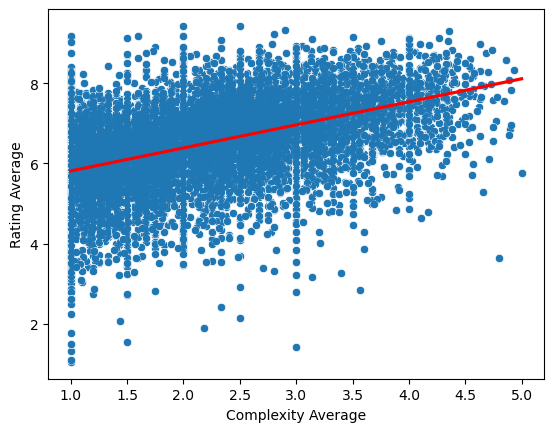

In [17]:
# Correlation between complexity and rating
sns.scatterplot(data=recent_games, x='Complexity Average', y='Rating Average')
sns.regplot(data=recent_games, x='Complexity Average', y='Rating Average', scatter_kws={'s':5}, line_kws={'color':'red'})

<Axes: xlabel='Mean Complexity', ylabel='Mean Rating'>

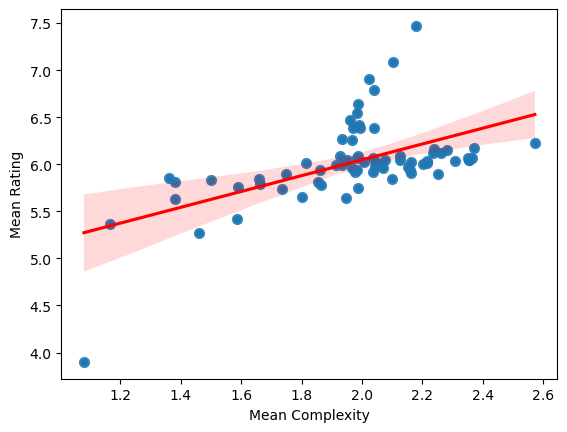

In [18]:
#Correlation between complexity and number of ratings grouped by year
yearly_data = recent_games.groupby('Year Published').agg({'Complexity Average':'mean', 'Rating Average':'mean'}).reset_index()
yearly_data.columns = ['Year Published', 'Mean Complexity', 'Mean Rating']
sns.scatterplot(data=yearly_data, x='Mean Complexity', y='Mean Rating')
sns.regplot(data=yearly_data, x='Mean Complexity', y='Mean Rating', scatter_kws={'s':50}, line_kws={'color':'red'})

<Axes: xlabel='Year Published', ylabel='Correlation'>

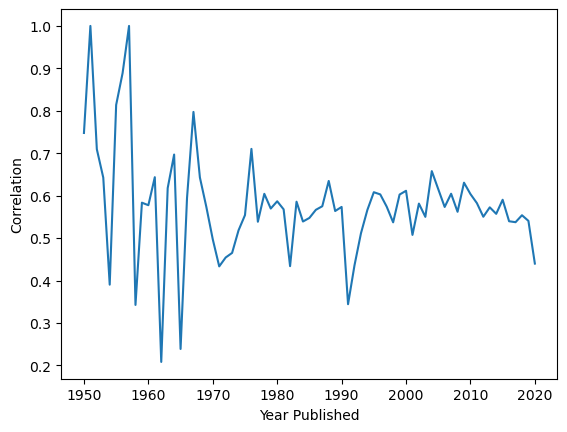

In [19]:
# For each year, get the correlation coefficient between complexity and rating
def corr_func(x):
    return x['Complexity Average'].corr(x['Rating Average'])
yearly_corr = recent_games.groupby('Year Published').apply(corr_func, include_groups=False).reset_index()
yearly_corr.columns = ['Year Published', 'Correlation']
sns.lineplot(data=yearly_corr, x='Year Published', y='Correlation')

# Conclusion
There appears to be a slight positive correlation between Complexity and the Ratings. 

More complex games tend to be rated higher and highly rated games are slightly more complex.